# Import packages and dataframes

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from anndata import AnnData, read_h5ad
import singlecellmultiomics.bamProcessing.bamToRNACounts
import scanpy.external as sce
import scipy

#scv.settings.verbosity = 3 # show errors(0), warnings(1), info(2), hints(3)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

#scv.settings.presenter_view = True  # set max width size for presenter view
#scv.set_figure_params('scvelo')  # for beautified visualization
sc.set_figure_params(dpi=100, color_map = 'viridis')

scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.6.0 pandas==1.2.0 scikit-learn==0.24.0 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [2]:
pathToData = '/Users/m.blotenburg/Documents/Projects/TCHIC/data/rep3_rep4/'

## Import and check adata transcriptome file

In [3]:
adata = sc.read(pathToData + 'dataframes/20210630_all_OUD5651_OUD5771_OUD5772_OUD6104_OUD5886_rep234_day34567_Scanpy.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 21482 × 25673
    obs: 'n_counts', 'n_genes', 'percent_mito', 'batch', 'day', 'replicates', 'mark', 'umap_density_mark', 'leiden_general', 'leiden', 'louvain', 'celltype', 'new_leiden', 'leiden_annot', 'leiden_merge', 'cellnames', 'bc', 'cellname'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'celltype_colors', 'day_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_annot_colors', 'leiden_colors', 'leiden_general_colors', 'leiden_merge_colors', 'louvain', 'louvain_colors', 'mark_colors', 'neighbors', 'new_leiden_colors', 'pca', 'rank_genes_groups', 'replicates_colors', 'umap', 'umap_density_mark_params'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs.head(2)

,n_counts,n_genes,percent_mito,batch,day,replicates,mark,umap_density_mark,leiden_general,leiden,louvain,celltype,new_leiden,leiden_annot,leiden_merge,cellnames,bc,cellname
index,,,,,,,,,,,,,,,,,,
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268,4155.0,2238,0.205563,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1,Gastd5,rep2,H3K27me3,0.693203,Mesoderm,26,1,Pharyngeal Mesoderm/SHF,m_2,Pharyngeal Mesoderm/SHF,Mesoderm,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1:ATCGTGCA,268,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368,11454.0,4306,0.134715,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1,Gastd5,rep2,H3K27me3,0.466547,Mesoderm,12,11,(pre)Somitic/Wavefront,m_0,(pre)Somitic/Wavefront,(pre)Somitic/Wavefront,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1:ACGAACAC,368,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368


In [6]:
adata.var.head(2)

,Accession,Chromosome,End,Start,Strand,n_cells,highly_variable,means,dispersions,dispersions_norm,mean,std
Xkr4,ENSMUSG00000051951,1,3671498,3205901,-,1725,True,0.015510,-1.300773,0.675529,-5.678081e-12,0.054883
Sox17,ENSMUSG00000025902,1,4497354,4490931,-,1384,True,0.017672,-0.801810,2.210406,7.145219e-12,0.069243


## Import and check chic files

In [7]:
TSS_table_k4 = pd.read_csv(pathToData + 'dataframes/peter/k4me3_rep234_day34567.TSS10kb.csv', index_col=(0,1,2,3), 
                        header= 0, low_memory=False)
TSS_table_k4 = TSS_table_k4.iloc[1:]
TSS_table_k4.index.names = ['reference_name','start','end', 'bname']
TSS_table_k4.head(2)

PZ-MB-TChIC-Gastd3-rep4-H3K4me3-2_240  \
reference_name start   end     bname                                                  
1              3070753 3075753 4933401J01Rik                                    1.0   
               4607971 4612971 Gm7369                                           1.0   

                                              PZ-MB-TChIC-Gastd4-rep4-H3K4me3-2_288  \
reference_name start   end     bname                                                  
1              3070753 3075753 4933401J01Rik                                    1.0   
               4607971 4612971 Gm7369                                           NaN   

                                              PZ-MB-TChIC-Gastd3-rep4-H3K4me3-5_329  \
reference_name start   end     bname                                                  
1              3070753 3075753 4933401J01Rik                                    1.0   
               4607971 4612971 Gm7369                                           NaN   

                                              PZ-MB-TChIC-Gastd3-rep4-H3K4me3-4_270  \
reference_name start   end     bname                                                  
1              3070753 3075753 4933401J01Rik                                    1.0   
               4607971 4612971 Gm7369                                           NaN   

                                              PZ-MB-TChIC-Gastd3-rep4-H3K4me3-4_173  \
reference_name start   end     bname                                                  
1              3070753 3075753 4933401J01Rik                                    1.0   
               4607971 4612971 Gm7369                                           NaN   

                                              PZ-MB-TChIC-Gastd3-rep4-H3K4me3-2_226  \
reference_name start   end     bname                                                  
1              3070753 3075753 4933401J01Rik                                    1.0   
               4607971 4612971 Gm7369                                           NaN   

                                              PZ-MB-TChIC-Gastd3-rep4-H3K4me3-4_246  \
reference_name start   end     bname                                                  
1              3070753 3075753 4933401J01Rik                                    1.0   
               4607971 4612971 Gm7369                                           NaN   

                                              PZ-MB-TChIC-Gastd3-rep4-H3K4me3-4_51  \
reference_name start   end     bname                                                 
1              3070753 3075753 4933401J01Rik                                   2.0   
               4607971 4612971 Gm7369                                          NaN   

                                              PZ-MB-TChIC-Gastd3-rep4-H3K4me3-2_218  \
reference_name start   end     bname                                                  
1              3070753 3075753 4933401J01Rik                                    1.0   
               4607971 4612971 Gm7369                                           NaN   

                                              PZ-MB-TChIC-Gastd3-rep4-H3K4me3-4_279  \
reference_name start   end     bname                                                  
1              3070753 3075753 4933401J01Rik                                    2.0   
               4607971 4612971 Gm7369                                           NaN   

                                              ...  \
reference_name start   end     bname          ...   
1              3070753 3075753 4933401J01Rik  ...   
               4607971 4612971 Gm7369         ...   

                                              PZ-MB-TChIC-Gastd7-rep2-H3K4me3-3_80  \
reference_name start   end     bname                                                 
1              3070753 3075753 4933401J01Rik                                   NaN   
               4607971 4612971 Gm7369                                          NaN   

  

In [8]:
TSS_table_k27 = pd.read_csv(pathToData + 'dataframes/peter/k27me3_rep234_day34567.TSS10kb.csv', index_col=(0,1,2,3), 
                        header= 0, low_memory=False)
TSS_table_k27 = TSS_table_k27.iloc[1:]
TSS_table_k27.index.names = ['reference_name','start','end', 'bname']
TSS_table_k27.head(2)

PZ-MB-TChIC-Gastd4-rep4-H3K27me3-4_138  \
reference_name start   end     bname                                                   
1              3070753 3075753 4933401J01Rik                                     1.0   
               9979887 9984887 Gm15818                                           1.0   

                                              PZ-MB-TChIC-Gastd6-rep2-H3K27me3-3_99  \
reference_name start   end     bname                                                  
1              3070753 3075753 4933401J01Rik                                    1.0   
               9979887 9984887 Gm15818                                          1.0   

                                              PZ-MB-TChIC-Gastd5-rep2-H3K27me3-5_281  \
reference_name start   end     bname                                                   
1              3070753 3075753 4933401J01Rik                                     1.0   
               9979887 9984887 Gm15818                                           NaN   

                                              PZ-MB-TChIC-Gastd5-rep4-H3K27me3-2_192  \
reference_name start   end     bname                                                   
1              3070753 3075753 4933401J01Rik                                     3.0   
               9979887 9984887 Gm15818                                           NaN   

                                              PZ-MB-TChIC-Gastd5-rep4-H3K27me3-2_54  \
reference_name start   end     bname                                                  
1              3070753 3075753 4933401J01Rik                                    1.0   
               9979887 9984887 Gm15818                                          NaN   

                                              PZ-MB-TChIC-Gastd5-rep3-H3K27me3-5_279  \
reference_name start   end     bname                                                   
1              3070753 3075753 4933401J01Rik                                     2.0   
               9979887 9984887 Gm15818                                           1.0   

                                              PZ-MB-TChIC-Gastd3-rep4-H3K27me3-2_152  \
reference_name start   end     bname                                                   
1              3070753 3075753 4933401J01Rik                                     1.0   
               9979887 9984887 Gm15818                                           NaN   

                                              PZ-MB-TChIC-Gastd7-rep2-H3K27me3-3_305  \
reference_name start   end     bname                                                   
1              3070753 3075753 4933401J01Rik                                     1.0   
               9979887 9984887 Gm15818                                           1.0   

                                              PZ-MB-TChIC-Gastd5-rep2-H3K27me3-4_316  \
reference_name start   end     bname                                                   
1              3070753 3075753 4933401J01Rik                                     3.0   
               9979887 9984887 Gm15818                                           NaN   

                                              PZ-MB-TChIC-Gastd3-rep4-H3K27me3-1_315  \
reference_name start   end     bname                                                   
1              3070753 3075753 4933401J01Rik                                     1.0   
               9979887 9984887 Gm15818                                           NaN   

                                              ...  \
reference_name start   end     bname          ...   
1              3070753 3075753 4933401J01Rik  ...   
               9979887 9984887 Gm15818        ...   

                                              PZ-MB-TChIC-Gastd7-rep2-H3K27me3-1_186  \
reference_name start   end     bname                                                   
1              3070753 3075753 4933401J01Rik                                     NaN   
               9979887 9984887 Gm15818         

In [9]:
TSS_k4 = TSS_table_k4.droplevel(['start', 'end', 'reference_name'], axis=0)
TSS_k4 = TSS_k4[~TSS_k4.index.duplicated(keep='first')]
TSS_k4.T.head(2)

bname,4933401J01Rik,Gm7369,Gm37567,Gm36964,Gm24276,1700034P13Rik,Gm29283,4930486I03Rik,Gsta3,Gm26524,...,Gm45965,Gm26392,Gm38699,Gm3208,Nid1,Gm49760,Gm16480,Gm48164,Rex2,Vmn1r177
PZ-MB-TChIC-Gastd3-rep4-H3K4me3-2_240,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PZ-MB-TChIC-Gastd4-rep4-H3K4me3-2_288,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
TSS_k27 = TSS_table_k27.droplevel(['start', 'end', 'reference_name'], axis=0)
TSS_k27 = TSS_k27[~TSS_k27.index.duplicated(keep='first')]
TSS_k27.T.head(2)

bname,4933401J01Rik,Gm15818,Gm22616,Gm9947,Tfap2d,Tfap2b,4930486I03Rik,Il17a,B3gat2,Gm25294,...,Gm28405,Gm34274,Gm12823,Cbx3-ps1,Gm13239,Gm5954,Gm21768,Gm18396,Trav14n-2,Zscan4b
PZ-MB-TChIC-Gastd4-rep4-H3K27me3-4_138,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PZ-MB-TChIC-Gastd6-rep2-H3K27me3-3_99,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
gb_table_k27 = pd.read_csv(pathToData + 'dataframes/peter/k27me3_rep234_day34567.genebody.csv', index_col=(0,1,2,3), 
                        header= 0, low_memory=False)
gb_table_k27 = gb_table_k27.iloc[1:]
gb_table_k27.index.names = ['reference_name','start','end', 'bname']
gb_k27 = gb_table_k27.droplevel(['start', 'end', 'reference_name'], axis=0)
gb_k27 = gb_k27[~gb_k27.index.duplicated(keep='first')]
gb_k27.T.head(2)

bname,4933401J01Rik,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Lypla1,Gm37988,Tcea1,Rgs20,...,Gm22694,Gm49769,Mir5132,Gm15922,Gm10335,Zscan4b,Gm5954,Gm21815,Vmn2r42,Gm6736
PZ-MB-TChIC-Gastd3-rep4-H3K27me3-1_281,1.0,22.0,1.0,6.0,24.0,1.0,2.0,3.0,1.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PZ-MB-TChIC-Gastd3-rep4-H3K27me3-2_305,1.0,29.0,2.0,4.0,12.0,NaN,NaN,1.0,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
gb_table_k4 = pd.read_csv(pathToData + 'dataframes/peter/k4me3_rep234_day34567.genebody.csv', index_col=(0,1,2,3), 
                        header= 0, low_memory=False)
gb_table_k4 = gb_table_k4.iloc[1:]
gb_table_k4.index.names = ['reference_name','start','end', 'bname']
gb_k4 = gb_table_k4.droplevel(['start', 'end', 'reference_name'], axis=0)
gb_k4 = gb_k4[~gb_k4.index.duplicated(keep='first')]
gb_k4.T.head(2)

bname,4933401J01Rik,Xkr4,Gm1992,Gm37381,Rp1,Lypla1,Gm37988,Tcea1,Gm37277,Rgs20,...,Gm12715,Igkv13-71-1,Mir30c-2,Gm14933,Mir1896,Gm25190,Rps3a2,Mir7216,Gm43810,Gm42785
PZ-MB-TChIC-Gastd3-rep4-H3K4me3-4_313,1.0,15.0,2.0,2.0,9.0,1.0,3.0,2.0,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PZ-MB-TChIC-Gastd3-rep4-H3K4me3-6_28,1.0,7.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Also import normalised dataframes

In [13]:
TSS_k27_normalised_95 = pd.read_csv(pathToData + 'dataframes/20210712_K27me3_TSS_count_table_normalised_percentile95.csv', index_col=0)
TSS_k27_normalised_95.T.head(2)

bname,4933401J01Rik,Gm15818,Gm22616,Gm9947,Tfap2d,Tfap2b,4930486I03Rik,Il17a,B3gat2,Gm25294,...,Gm28405,Gm34274,Gm12823,Cbx3-ps1,Gm13239,Gm5954,Gm21768,Gm18396,Trav14n-2,Zscan4b
PZ-MB-TChIC-Gastd4-rep4-H3K27me3-4_138,0.500000,0.500000,0.5,0.500000,1.000000,0.5,0.500000,0.500000,0.500000,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PZ-MB-TChIC-Gastd6-rep2-H3K27me3-3_99,0.333333,0.333333,NaN,0.333333,0.666667,NaN,0.666667,0.333333,0.666667,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
TSS_k27_normalised_98 = pd.read_csv(pathToData + 'dataframes/20210712_K27me3_TSS_count_table_normalised_percentile98.csv', index_col=0)
TSS_k27_normalised_98.T.head(2)

bname,4933401J01Rik,Gm15818,Gm22616,Gm9947,Tfap2d,Tfap2b,4930486I03Rik,Il17a,B3gat2,Gm25294,...,Gm28405,Gm34274,Gm12823,Cbx3-ps1,Gm13239,Gm5954,Gm21768,Gm18396,Trav14n-2,Zscan4b
PZ-MB-TChIC-Gastd4-rep4-H3K27me3-4_138,0.50,0.50,0.5,0.50,1.0,0.5,0.5,0.50,0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PZ-MB-TChIC-Gastd6-rep2-H3K27me3-3_99,0.25,0.25,NaN,0.25,0.5,NaN,0.5,0.25,0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
TSS_k4_normalised_95 = pd.read_csv(pathToData + 'dataframes/20210712_K4me3_TSS_count_table_normalised_percentile95.csv', index_col=0)
TSS_k4_normalised_95.T.head(2)

bname,4933401J01Rik,Gm7369,Gm37567,Gm36964,Gm24276,1700034P13Rik,Gm29283,4930486I03Rik,Gsta3,Gm26524,...,Gm45965,Gm26392,Gm38699,Gm3208,Nid1,Gm49760,Gm16480,Gm48164,Rex2,Vmn1r177
PZ-MB-TChIC-Gastd3-rep4-H3K4me3-2_240,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PZ-MB-TChIC-Gastd4-rep4-H3K4me3-2_288,0.5,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
TSS_k4_normalised_98 = pd.read_csv(pathToData + 'dataframes/20210712_K4me3_TSS_count_table_normalised_percentile98.csv', index_col=0)
TSS_k4_normalised_98.T.head(2)

bname,4933401J01Rik,Gm7369,Gm37567,Gm36964,Gm24276,1700034P13Rik,Gm29283,4930486I03Rik,Gsta3,Gm26524,...,Gm45965,Gm26392,Gm38699,Gm3208,Nid1,Gm49760,Gm16480,Gm48164,Rex2,Vmn1r177
PZ-MB-TChIC-Gastd3-rep4-H3K4me3-2_240,0.500000,0.5,0.5,0.5,0.5,0.500000,0.5,0.5,0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PZ-MB-TChIC-Gastd4-rep4-H3K4me3-2_288,0.333333,NaN,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gb_k27_normalised_95 = pd.read_csv(pathToData + 'dataframes/20210712_K27me3_gb_count_table_normalised_percentile95.csv', index_col=0)
gb_k27_normalised_95.T.head(2)

In [ ]:
gb_k27_normalised_98 = pd.read_csv(pathToData + 'dataframes/20210712_K27me3_gb_count_table_normalised_percentile98.csv', index_col=0)
gb_k27_normalised_98.T.head(2)

In [ ]:
gb_k4_normalised_95 = pd.read_csv(pathToData + 'dataframes/20210712_K4me3_gb_count_table_normalised_percentile95.csv', index_col=0)
gb_k4_normalised_95.T.head(2)

In [ ]:
gb_k4_normalised_98 = pd.read_csv(pathToData + 'dataframes/20210712_K4me3_gb_count_table_normalised_percentile98.csv', index_col=0)
gb_k4_normalised_98.T.head(2)

## Check shapes of dataframes

In [17]:
TSS_k4.shape

(52208, 7535)

In [18]:
TSS_k4_normalised_95.shape

(52208, 7535)

In [19]:
TSS_k4_normalised_98.shape

(52208, 7535)

In [20]:
TSS_k27.shape

(53156, 11621)

In [21]:
TSS_k27_normalised_95.shape

(53156, 11621)

In [22]:
TSS_k27_normalised_98.shape

(53156, 11621)

In [23]:
gb_k4.shape

(48585, 7535)

In [ ]:
gb_k4_normalised_95.shape

In [ ]:
gb_k4_normalised_98.shape

In [24]:
gb_k27.shape

(51591, 11621)

In [ ]:
gb_k27_normalised_95.shape

In [ ]:
gb_k27_normalised_98.shape

In [25]:
len(adata.var), len(adata.obs)

(25673, 21482)

In [26]:
len(TSS_k27.T) + len(TSS_k4.T)

19156

we need to make the index names identical between the adata transcriptome file and the chic TSS matrices.

In [27]:
adata.obs.head(2)

,n_counts,n_genes,percent_mito,batch,day,replicates,mark,umap_density_mark,leiden_general,leiden,louvain,celltype,new_leiden,leiden_annot,leiden_merge,cellnames,bc,cellname
index,,,,,,,,,,,,,,,,,,
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268,4155.0,2238,0.205563,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1,Gastd5,rep2,H3K27me3,0.693203,Mesoderm,26,1,Pharyngeal Mesoderm/SHF,m_2,Pharyngeal Mesoderm/SHF,Mesoderm,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1:ATCGTGCA,268,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368,11454.0,4306,0.134715,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1,Gastd5,rep2,H3K27me3,0.466547,Mesoderm,12,11,(pre)Somitic/Wavefront,m_0,(pre)Somitic/Wavefront,(pre)Somitic/Wavefront,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1:ACGAACAC,368,PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368


Make K27 and K4 chic dataframes in the same shape and order as adata

In [28]:
k27MatrixForAdata = TSS_k27.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T

In [29]:
k27MatrixForAdata.head(2)

,Xkr4,Sox17,Gm37323,Gm6085,Gm6119,Gm25493,Gm2053,Mrpl15,Gm6104,Gm37277,...,Uba1y,Kdm5d,Eif2s3y,Gm29650,Gapdh-ps15,Gm20931,Gm29404,Gm21758,Mid1-ps1,Gm47283
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
k4MatrixForAdata = TSS_k4.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T

In [31]:
k4MatrixForAdata.head(2)

,Xkr4,Sox17,Gm37323,Gm6085,Gm6119,Gm25493,Gm2053,Mrpl15,Gm6104,Gm37277,...,Uba1y,Kdm5d,Eif2s3y,Gm29650,Gapdh-ps15,Gm20931,Gm29404,Gm21758,Mid1-ps1,Gm47283
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


And the same for normalised dataframes

In [32]:
k27NormalisedMatrixForAdata95 = TSS_k27_normalised_95.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T

In [33]:
k27NormalisedMatrixForAdata95.head(2)

,Xkr4,Sox17,Gm37323,Gm6085,Gm6119,Gm25493,Gm2053,Mrpl15,Gm6104,Gm37277,...,Uba1y,Kdm5d,Eif2s3y,Gm29650,Gapdh-ps15,Gm20931,Gm29404,Gm21758,Mid1-ps1,Gm47283
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
k27NormalisedMatrixForAdata98 = TSS_k27_normalised_98.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T
k27NormalisedMatrixForAdata98.head(2)

,Xkr4,Sox17,Gm37323,Gm6085,Gm6119,Gm25493,Gm2053,Mrpl15,Gm6104,Gm37277,...,Uba1y,Kdm5d,Eif2s3y,Gm29650,Gapdh-ps15,Gm20931,Gm29404,Gm21758,Mid1-ps1,Gm47283
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
k4NormalisedMatrixForAdata95 = TSS_k4_normalised_95.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T

In [36]:
k4NormalisedMatrixForAdata95.head(2)

,Xkr4,Sox17,Gm37323,Gm6085,Gm6119,Gm25493,Gm2053,Mrpl15,Gm6104,Gm37277,...,Uba1y,Kdm5d,Eif2s3y,Gm29650,Gapdh-ps15,Gm20931,Gm29404,Gm21758,Mid1-ps1,Gm47283
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
k4NormalisedMatrixForAdata98 = TSS_k4_normalised_98.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T
k4NormalisedMatrixForAdata98.head(2)

,Xkr4,Sox17,Gm37323,Gm6085,Gm6119,Gm25493,Gm2053,Mrpl15,Gm6104,Gm37277,...,Uba1y,Kdm5d,Eif2s3y,Gm29650,Gapdh-ps15,Gm20931,Gm29404,Gm21758,Mid1-ps1,Gm47283
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Add gene body tables

In [38]:
k27_gb_MatrixForAdata = gb_k27.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T
k27_gb_MatrixForAdata.head(2)

,Xkr4,Sox17,Gm37323,Gm6085,Gm6119,Gm25493,Gm2053,Mrpl15,Gm6104,Gm37277,...,Uba1y,Kdm5d,Eif2s3y,Gm29650,Gapdh-ps15,Gm20931,Gm29404,Gm21758,Mid1-ps1,Gm47283
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
k27_gb_NormalisedMatrixForAdata95 = gb_k27_normalised_95.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T
k27_gb_NormalisedMatrixForAdata95.head(2)

In [ ]:
k27_gb_NormalisedMatrixForAdata98 = gb_k27_normalised_98.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T
k27_gb_NormalisedMatrixForAdata98.head(2)

In [39]:
k4_gb_MatrixForAdata = gb_k4.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T
k4_gb_MatrixForAdata.head(2)

,Xkr4,Sox17,Gm37323,Gm6085,Gm6119,Gm25493,Gm2053,Mrpl15,Gm6104,Gm37277,...,Uba1y,Kdm5d,Eif2s3y,Gm29650,Gapdh-ps15,Gm20931,Gm29404,Gm21758,Mid1-ps1,Gm47283
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
k4_gb_NormalisedMatrixForAdata95 = gb_k4_normalised_95.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T
k4_gb_NormalisedMatrixForAdata95.head(2)

In [ ]:
k4_gb_NormalisedMatrixForAdata98 = gb_k4_normalised_98.T.merge(adata.obs['cellnames'], 
                left_index=True,
                right_index=True, 
                how="right").fillna(0).drop('cellnames', 
                                            axis = 1).T.merge(adata.var['Accession'],
                                                              left_index=True,right_index=True,
                                                             how="right").fillna(0).drop('Accession', axis=1).reindex(adata.var.index).T
k4_gb_NormalisedMatrixForAdata98.head(2)

Add K4 and K27 raw dataframes as new layer to adata

In [40]:
adata.layers['k27_TSS_raw'] = scipy.sparse.csr_matrix(k27MatrixForAdata,dtype=np.float32)

In [41]:
adata.layers['k27_TSS_norm'] = scipy.sparse.csr_matrix(k27NormalisedMatrixForAdata95,dtype=np.float32)

In [42]:
adata.layers['k27_TSS_norm98'] = scipy.sparse.csr_matrix(k27NormalisedMatrixForAdata98,dtype=np.float32)

In [43]:
adata.layers['k4_TSS_raw'] = scipy.sparse.csr_matrix(k4MatrixForAdata,dtype=np.float32)

In [44]:
adata.layers['k4_TSS_norm'] = scipy.sparse.csr_matrix(k4NormalisedMatrixForAdata95,dtype=np.float32)

In [45]:
adata.layers['k4_TSS_norm98'] = scipy.sparse.csr_matrix(k4NormalisedMatrixForAdata98,dtype=np.float32)

In [46]:
adata.layers['k27_GB_raw'] = scipy.sparse.csr_matrix(k27_gb_MatrixForAdata,dtype=np.float32)

In [ ]:
adata.layers['k27_GB_norm'] = scipy.sparse.csr_matrix(k27_gb_NormalisedMatrixForAdata95,dtype=np.float32)

In [ ]:
adata.layers['k27_GB_norm98'] = scipy.sparse.csr_matrix(k27_gb_NormalisedMatrixForAdata98,dtype=np.float32)

In [47]:
adata.layers['k4_GB_raw'] = scipy.sparse.csr_matrix(k4_gb_MatrixForAdata,dtype=np.float32)

In [ ]:
adata.layers['k4_GB_norm'] = scipy.sparse.csr_matrix(k4_gb_NormalisedMatrixForAdata95,dtype=np.float32)

In [ ]:
adata.layers['k4_GB_norm98'] = scipy.sparse.csr_matrix(k4_gb_NormalisedMatrixForAdata98,dtype=np.float32)

Also change spliced/unspliced integers to floats 

In [48]:
adata.layers['spliced'] = scipy.sparse.csr_matrix(pd.DataFrame(adata.layers['spliced'].toarray()),dtype=np.float32)

In [49]:
adata.layers['unspliced'] = scipy.sparse.csr_matrix(pd.DataFrame(adata.layers['unspliced'].toarray()),dtype=np.float32)

Check if they are in the same shape, size, type as regular layers.

In [50]:
adata.layers['spliced']

<21482x25673 sparse matrix of type '<class 'numpy.float32'>'
	with 67810673 stored elements in Compressed Sparse Row format>

In [51]:
adata.raw.X

<21482x25673 sparse matrix of type '<class 'numpy.float32'>'
	with 67810673 stored elements in Compressed Sparse Row format>

In [52]:
adata.layers['k27_TSS_raw']

<21482x25673 sparse matrix of type '<class 'numpy.float32'>'
	with 23884812 stored elements in Compressed Sparse Row format>

In [53]:
adata.layers['k27_TSS_norm']

<21482x25673 sparse matrix of type '<class 'numpy.float32'>'
	with 23884812 stored elements in Compressed Sparse Row format>

In [54]:
adata.layers['k27_TSS_norm98']

<21482x25673 sparse matrix of type '<class 'numpy.float32'>'
	with 23884812 stored elements in Compressed Sparse Row format>

In [55]:
adata.layers['k4_TSS_raw']

<21482x25673 sparse matrix of type '<class 'numpy.float32'>'
	with 9660817 stored elements in Compressed Sparse Row format>

In [56]:
adata.layers['k4_TSS_norm']

<21482x25673 sparse matrix of type '<class 'numpy.float32'>'
	with 9660817 stored elements in Compressed Sparse Row format>

In [57]:
adata.layers['k4_TSS_norm98']

<21482x25673 sparse matrix of type '<class 'numpy.float32'>'
	with 9660817 stored elements in Compressed Sparse Row format>

In [58]:
adata.layers['k4_GB_raw']

<21482x25673 sparse matrix of type '<class 'numpy.float32'>'
	with 14921173 stored elements in Compressed Sparse Row format>

In [ ]:
adata.layers['k4_GB_norm']

In [ ]:
adata.layers['k4_GB_norm98']

In [59]:
adata.layers['k27_GB_raw']

<21482x25673 sparse matrix of type '<class 'numpy.float32'>'
	with 49740656 stored elements in Compressed Sparse Row format>

In [ ]:
adata.layers['k27_GB_norm']

In [ ]:
adata.layers['k27_GB_norm98']

In [60]:
type(adata.layers['spliced'])

scipy.sparse.csr.csr_matrix

In [61]:
type(adata.raw.X)

scipy.sparse.csr.csr_matrix

In [62]:
type(adata.layers['k4_TSS_raw'])

scipy.sparse.csr.csr_matrix

In [63]:
type(adata.layers['k4_TSS_norm'])

scipy.sparse.csr.csr_matrix

In [64]:
type(adata.layers['k4_TSS_norm98'])

scipy.sparse.csr.csr_matrix

In [65]:
type(adata.layers['k27_TSS_raw'])

scipy.sparse.csr.csr_matrix

In [66]:
type(adata.layers['k27_TSS_norm'])

scipy.sparse.csr.csr_matrix

In [67]:
type(adata.layers['k27_TSS_norm98'])

scipy.sparse.csr.csr_matrix

In [68]:
type(adata.layers['k4_GB_raw'])

scipy.sparse.csr.csr_matrix

In [ ]:
type(adata.layers['k4_GB_norm'])

In [ ]:
type(adata.layers['k4_GB_norm98'])

In [69]:
type(adata.layers['k27_GB_raw'])

scipy.sparse.csr.csr_matrix

In [ ]:
type(adata.layers['k27_GB_norm'])

In [ ]:
type(adata.layers['k27_GB_norm98'])

In [70]:
#To check inside sparse matrix:
#pd.DataFrame(adata.layers['ambiguous'].toarray()) 

Now we can make all sorts of plots with these layers

In [75]:
layers = ['unspliced','spliced','k4_TSS_raw','k4_GB_raw','k27_TSS_raw','k27_GB_raw']

unspliced


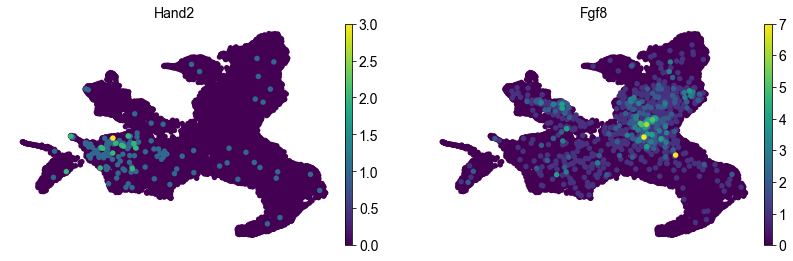

spliced


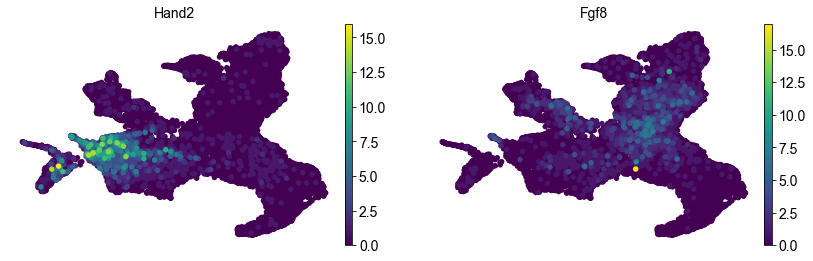

k4_TSS_raw


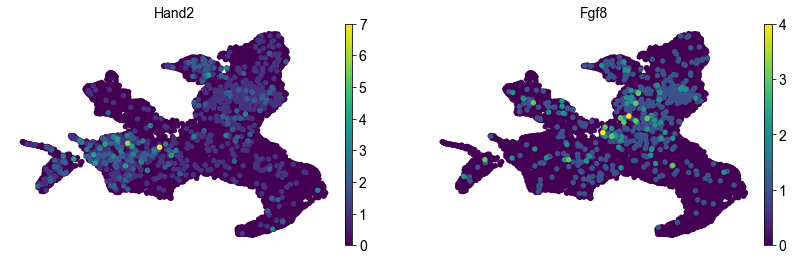

k4_GB_raw


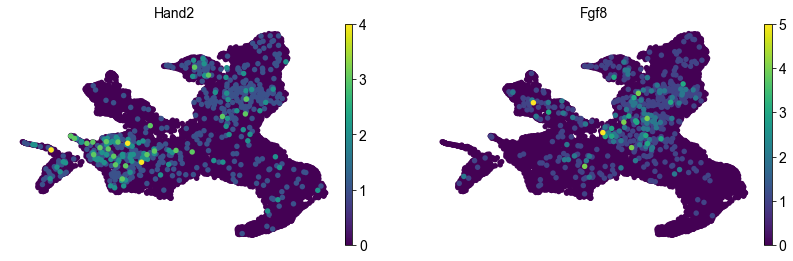

k27_TSS_raw


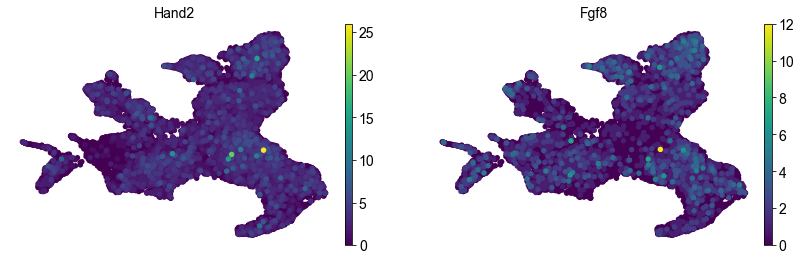

k27_GB_raw


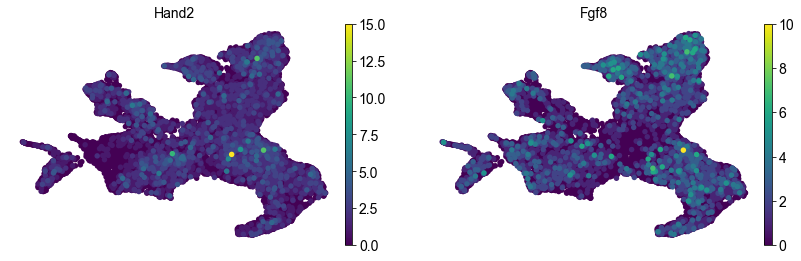

In [76]:
for layer in layers:
    print(layer)
    sc.pl.umap(adata,color=["Hand2","Fgf8"], size = 120,layer=layer, frameon=False)
    


In [71]:
adata_1D = adata.copy()

sc.tl.umap(adata_1D, n_components=1)

adata.obs['umap_1D'] = adata_1D.obsm['X_umap']
adata.obs['umap_1D_rescale'] = ((adata.obs['umap_1D']-adata.obs['umap_1D'].min())/(adata.obs['umap_1D'].max()-adata.obs['umap_1D'].min()))



computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


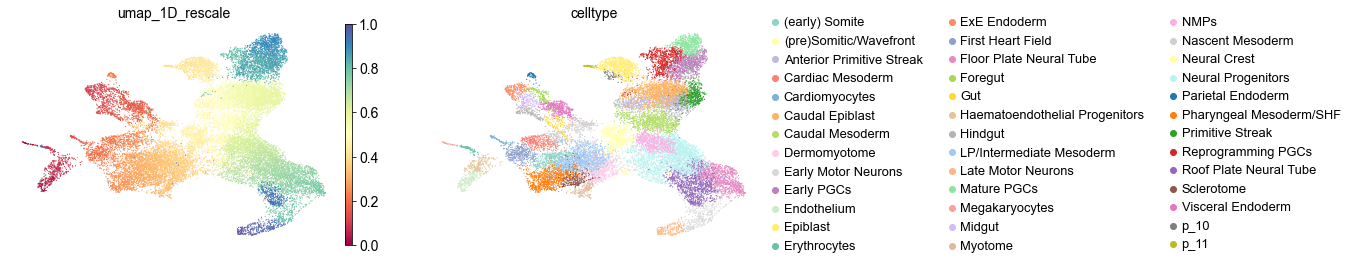

In [72]:
sc.pl.umap(adata, color = ['umap_1D_rescale', 'celltype'], frameon=False, color_map = 'Spectral')

Save dataframe with added chic layers:

In [73]:
#adata.obs['celltype_old'] = adata.obs['celltype']
#adata.obs['celltype'] = adata.obs['celltype_final']

In [74]:
results_file = pathToData + '/dataframes/20210712_TCHIC_rep234_day34567_adata_trans_chic_raw_percentileNormalised.h5ad' 
adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading

# QC / plots etc.

In [77]:
merged = pd.concat([TSS_k27.T, TSS_k4.T])
merged.head(2)

bname,4933401J01Rik,Gm15818,Gm22616,Gm9947,Tfap2d,Tfap2b,4930486I03Rik,Il17a,B3gat2,Gm25294,...,Gm21720,Gm12814,Gm37627,Gm21937,Gm48323,Gm4064,Gm6228,Gm48322,Trav3n-2,Gm45965
PZ-MB-TChIC-Gastd4-rep4-H3K27me3-4_138,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PZ-MB-TChIC-Gastd6-rep2-H3K27me3-3_99,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
trans = pd.DataFrame(adata.layers['matrix'].toarray())
trans.index = adata.obs.index
trans.columns = adata.var.index
trans.head(2)

,Xkr4,Sox17,Gm37323,Gm6085,Gm6119,Gm25493,Gm2053,Mrpl15,Gm6104,Gm37277,...,Uba1y,Kdm5d,Eif2s3y,Gm29650,Gapdh-ps15,Gm20931,Gm29404,Gm21758,Mid1-ps1,Gm47283
index,,,,,,,,,,,,,,,,,,,,,
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
PZ-MB-TChIC-Gastd5-rep2-H3K27me3-1_368,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [88]:
trans['day'] = adata.obs['day']

In [89]:
dict1 = {}
for value in trans['day'].unique():
    dict1[value] = trans[trans['day'] == value].sum()

matrixt = pd.DataFrame(dict1)

In [90]:
matrixt.head(2)

,Gastd5,Gastd6,Gastd7,Gastd3,Gastd4
Xkr4,14226.0,4263.0,6590.0,36642.0,18463.0
Sox17,2321.0,1259.0,679.0,72.0,255.0


In [91]:
for day in trans['day'].unique():
    print(day, trans['day'].str.count(day).sum())

Gastd5 6657
Gastd6 4180
Gastd7 3977
Gastd3 3948
Gastd4 2720


(-5.0, 50.0)

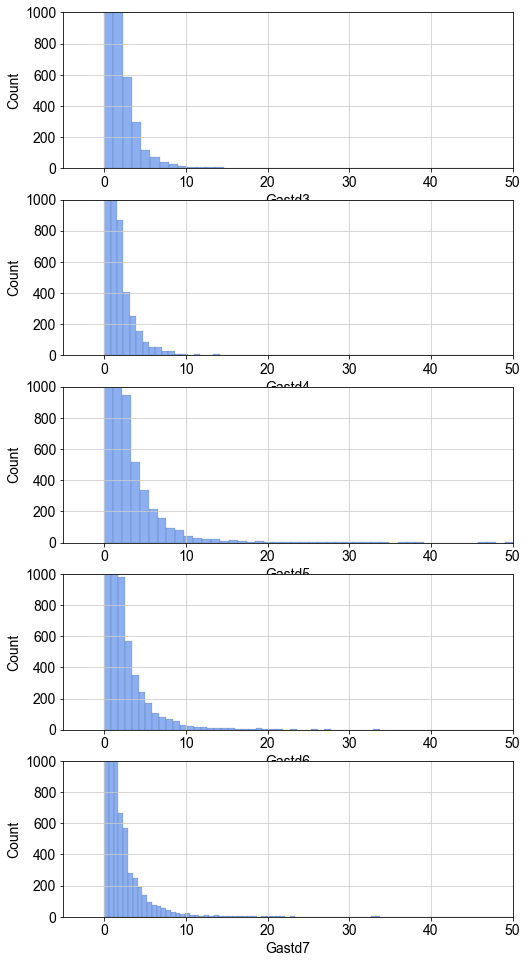

In [103]:
fig, ax = plt.subplots(5,1,figsize = (8,16))
#plt.suptitle("green = k4, red = k27") 
sns.histplot(matrixt['Gastd3']/3948, color="cornflowerblue", ax=ax[0], bins = 450)
sns.histplot(matrixt['Gastd4']/2720, color="cornflowerblue", ax=ax[1], bins = 450)
sns.histplot(matrixt['Gastd5']/6657, color="cornflowerblue", ax=ax[2], bins = 450)
sns.histplot(matrixt['Gastd6']/4180, color="cornflowerblue", ax=ax[3], bins = 450)
sns.histplot(matrixt['Gastd7']/3977, color="cornflowerblue", ax=ax[4], bins = 450)

ax[0].set_ylim(0, 1000)
ax[1].set_ylim(0, 1000)
ax[2].set_ylim(0, 1000)
ax[3].set_ylim(0, 1000)
ax[4].set_ylim(0, 1000)

ax[0].set_xlim(-5, 50)
ax[1].set_xlim(-5, 50)
ax[2].set_xlim(-5, 50)
ax[3].set_xlim(-5, 50)
ax[4].set_xlim(-5, 50)

Text(0.5, 1.0, 'day')

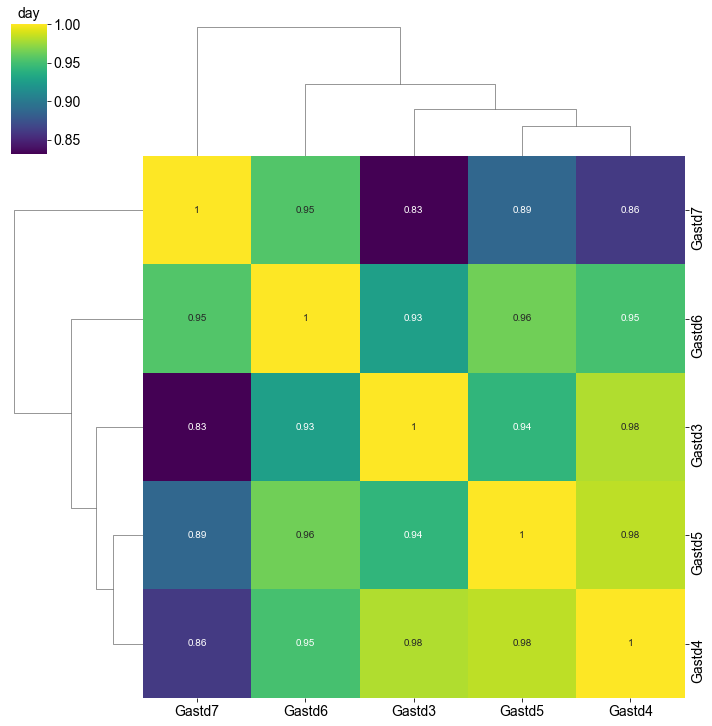

In [93]:
sns.clustermap(matrixt.astype(float).corr(method='pearson'),figsize=(10,10), cmap = 'viridis', annot=True)
plt.title('day')

In [104]:
adata.obs['day_mark'] = adata.obs['day'].astype(str) + '_' + adata.obs['mark'].astype(str)

In [105]:
merged['day_mark'] = adata.obs['day_mark']

In [106]:
len(merged.loc['PZ-MB-TChIC-Gastd5-rep4-H3K27me3-6_129'].dropna())/len(merged.loc['PZ-MB-TChIC-Gastd5-rep4-H3K27me3-6_129'])

0.2953925973269169

In [128]:
newdict = {}
for cell in merged.index:
    newdict[cell] = (len(merged.loc[cell].dropna())/len(merged.loc[cell]))

In [129]:
coveragedict = pd.DataFrame(newdict, index = ['coverage']).T

In [130]:
coveragedict['mark'] = adata.obs['mark']

In [131]:
adata.obs['cov_k27'] = coveragedict[coveragedict['mark'] == 'H3K27me3']['coverage']

In [132]:
adata.obs['cov_k4'] = coveragedict[coveragedict['mark'] == 'H3K4me3']['coverage']

... storing 'day_mark' as categorical


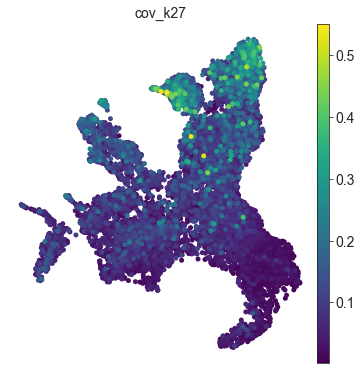

In [133]:
fig,ax = plt.subplots(figsize=(6,6))
sc.pl.umap(adata, color = 'cov_k27', ax=ax, color_map = 'viridis', size = 100, frameon=False)

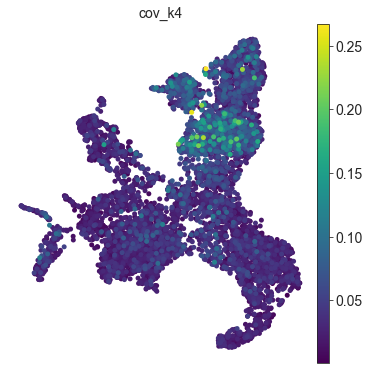

In [134]:
fig,ax = plt.subplots(figsize=(6,6))
sc.pl.umap(adata, color = 'cov_k4', ax=ax, color_map = 'viridis', size = 100, frameon=False)

In [108]:
dict1 = {}
for value in merged['day_mark'].unique():
    dict1[value] = merged[merged['day_mark'] == value].sum()

matrix = pd.DataFrame(dict1)

In [109]:
matrix = matrix.drop(index = 'day_mark')

In [110]:
matrix

,Gastd4_H3K27me3,Gastd6_H3K27me3,Gastd5_H3K27me3,Gastd3_H3K27me3,Gastd7_H3K27me3,Gastd3_H3K4me3,Gastd4_H3K4me3,Gastd7_H3K4me3,Gastd6_H3K4me3,Gastd5_H3K4me3
bname,,,,,,,,,,
4933401J01Rik,112.0,27.0,109.0,129.0,27.0,56.0,1.0,3.0,2.0,0.0
Gm15818,231.0,194.0,535.0,239.0,136.0,47.0,3.0,3.0,12.0,12.0
Gm22616,122.0,62.0,160.0,139.0,76.0,49.0,3.0,5.0,2.0,3.0
Gm9947,858.0,792.0,2674.0,879.0,681.0,90.0,13.0,13.0,19.0,23.0
Tfap2d,1506.0,1881.0,5408.0,1488.0,1792.0,274.0,49.0,22.0,17.0,26.0
...,...,...,...,...,...,...,...,...,...,...
Gm4064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Gm6228,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Gm48322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [111]:
for daymark in merged['day_mark'].unique():
    print(daymark, merged['day_mark'].str.count(daymark).sum())

Gastd4_H3K27me3 1927
Gastd6_H3K27me3 1854
Gastd5_H3K27me3 4222
Gastd3_H3K27me3 1825
Gastd7_H3K27me3 1793
Gastd3_H3K4me3 1940
Gastd4_H3K4me3 629
Gastd7_H3K4me3 1720
Gastd6_H3K4me3 1611
Gastd5_H3K4me3 1635


In [112]:
matrix['Gastd5_H3K27me3']/4222

bname
4933401J01Rik    0.025817
Gm15818          0.126717
Gm22616          0.037897
Gm9947           0.633349
Tfap2d           1.280910
                   ...   
Gm4064           0.000000
Gm6228           0.000000
Gm48322          0.000000
Trav3n-2         0.000000
Gm45965          0.000000
Name: Gastd5_H3K27me3, Length: 53196, dtype: object

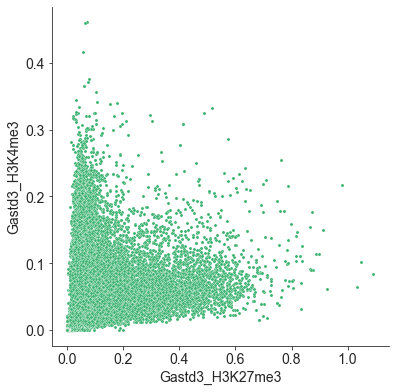

In [113]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x=matrix['Gastd3_H3K27me3']/1825, y = matrix['Gastd3_H3K4me3']/1940, ax=ax, 
                color = 'mediumseagreen', s=10)
sns.despine()

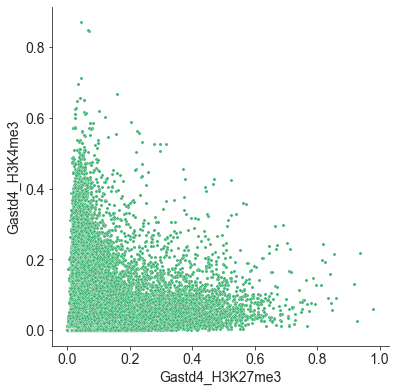

In [114]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x=matrix['Gastd4_H3K27me3']/1927, y = matrix['Gastd4_H3K4me3']/629, ax=ax, 
                color = 'mediumseagreen', s = 10)
sns.despine()

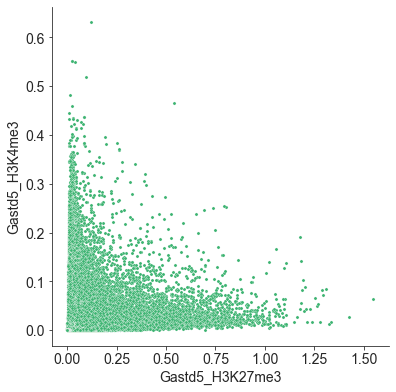

In [115]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x=matrix['Gastd5_H3K27me3']/4222, y = matrix['Gastd5_H3K4me3']/1635, ax=ax, 
                color = 'mediumseagreen', s = 10)
sns.despine()

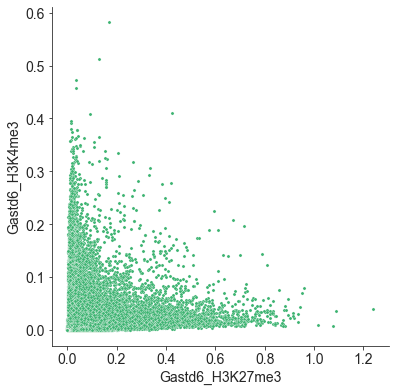

In [116]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x=matrix['Gastd6_H3K27me3']/1854, y = matrix['Gastd6_H3K4me3']/1611, ax=ax, 
                color = 'mediumseagreen', s = 10)
sns.despine()

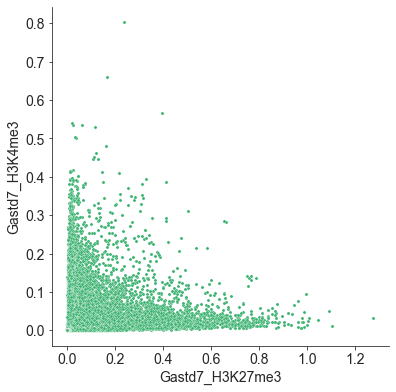

In [117]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x=matrix['Gastd7_H3K27me3']/1793, y = matrix['Gastd7_H3K4me3']/1720, ax=ax, 
                color = 'mediumseagreen', s = 10)
sns.despine()

(-0.01, 0.3)

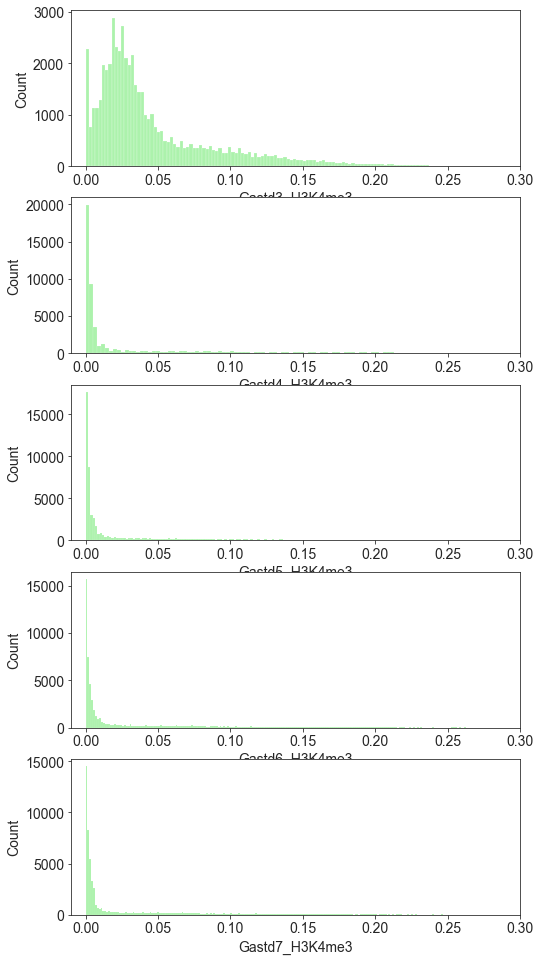

In [125]:
fig, ax = plt.subplots(5,1,figsize = (8,16))
#plt.suptitle("green = k4, red = k27") 
sns.histplot(matrix['Gastd3_H3K4me3']/1940, color="lightgreen", ax=ax[0])
sns.histplot(matrix['Gastd4_H3K4me3']/629, color="lightgreen", ax=ax[1])
sns.histplot(matrix['Gastd5_H3K4me3']/1635, color="lightgreen", ax=ax[2])
sns.histplot(matrix['Gastd6_H3K4me3']/1611, color="lightgreen", ax=ax[3])
sns.histplot(matrix['Gastd7_H3K4me3']/1720, color="lightgreen", ax=ax[4])

ax[0].set_xlim(-0.010, 0.3)
ax[1].set_xlim(-0.010, 0.3)
ax[2].set_xlim(-0.010, 0.3)
ax[3].set_xlim(-0.010, 0.3)
ax[4].set_xlim(-0.010, 0.3)

(-0.01, 0.6)

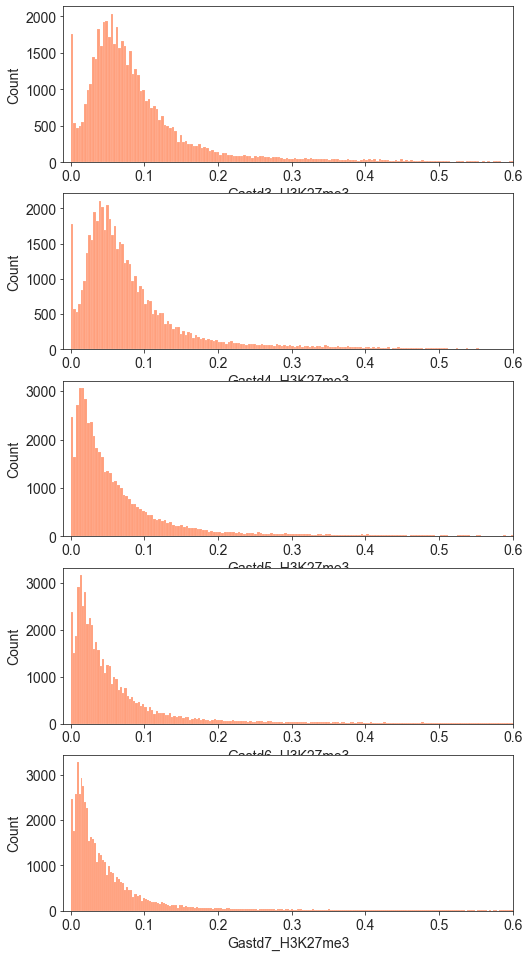

In [126]:
fig, ax = plt.subplots(5,1,figsize = (8,16))
#plt.suptitle("green = k4, red = k27") 
sns.histplot(matrix['Gastd3_H3K27me3']/1825, color="coral", ax=ax[0])
sns.histplot(matrix['Gastd4_H3K27me3']/1927, color="coral", ax=ax[1])
sns.histplot(matrix['Gastd5_H3K27me3']/4222, color="coral", ax=ax[2])
sns.histplot(matrix['Gastd6_H3K27me3']/1854, color="coral", ax=ax[3])
sns.histplot(matrix['Gastd7_H3K27me3']/1793, color="coral", ax=ax[4])

ax[0].set_xlim(-0.010, 0.6)
ax[1].set_xlim(-0.010, 0.6)
ax[2].set_xlim(-0.010, 0.6)
ax[3].set_xlim(-0.010, 0.6)
ax[4].set_xlim(-0.010, 0.6)

In [120]:
for nr, daymark in enumerate(matrix):
    print(daymark, matrix[daymark].mean())
    

Gastd4_H3K27me3 168.6891307617114
Gastd6_H3K27me3 124.62290397774268
Gastd5_H3K27me3 362.4566696744116
Gastd3_H3K27me3 175.62463343108504
Gastd7_H3K27me3 106.7734228137454
Gastd3_H3K4me3 92.04284156703511
Gastd4_H3K4me3 28.198153996541095
Gastd7_H3K4me3 44.76312128731484
Gastd6_H3K4me3 39.460391758778854
Gastd5_H3K4me3 46.9851680577487


In [121]:
matrix.astype(float).corr()

,Gastd4_H3K27me3,Gastd6_H3K27me3,Gastd5_H3K27me3,Gastd3_H3K27me3,Gastd7_H3K27me3,Gastd3_H3K4me3,Gastd4_H3K4me3,Gastd7_H3K4me3,Gastd6_H3K4me3,Gastd5_H3K4me3
Gastd4_H3K27me3,1.000000,0.931925,0.953581,0.983330,0.916524,0.153386,0.023109,0.008989,0.001210,0.000424
Gastd6_H3K27me3,0.931925,1.000000,0.985307,0.906317,0.984215,0.137398,0.044400,0.004248,-0.001885,-0.000039
Gastd5_H3K27me3,0.953581,0.985307,1.000000,0.926926,0.975191,0.146083,0.054188,0.019449,0.013863,0.015601
Gastd3_H3K27me3,0.983330,0.906317,0.926926,1.000000,0.894331,0.158839,0.031175,0.018971,0.010308,0.009091
Gastd7_H3K27me3,0.916524,0.984215,0.975191,0.894331,1.000000,0.147837,0.058877,0.013409,0.009399,0.014688
Gastd3_H3K4me3,0.153386,0.137398,0.146083,0.158839,0.147837,1.000000,0.936713,0.887441,0.900603,0.914540
Gastd4_H3K4me3,0.023109,0.044400,0.054188,0.031175,0.058877,0.936713,1.000000,0.947654,0.958781,0.968530
Gastd7_H3K4me3,0.008989,0.004248,0.019449,0.018971,0.013409,0.887441,0.947654,1.000000,0.981737,0.975821
Gastd6_H3K4me3,0.001210,-0.001885,0.013863,0.010308,0.009399,0.900603,0.958781,0.981737,1.000000,0.983729
Gastd5_H3K4me3,0.000424,-0.000039,0.015601,0.009091,0.014688,0.914540,0.968530,0.975821,0.983729,1.000000


Text(0.5, 1.0, 'day_mark')

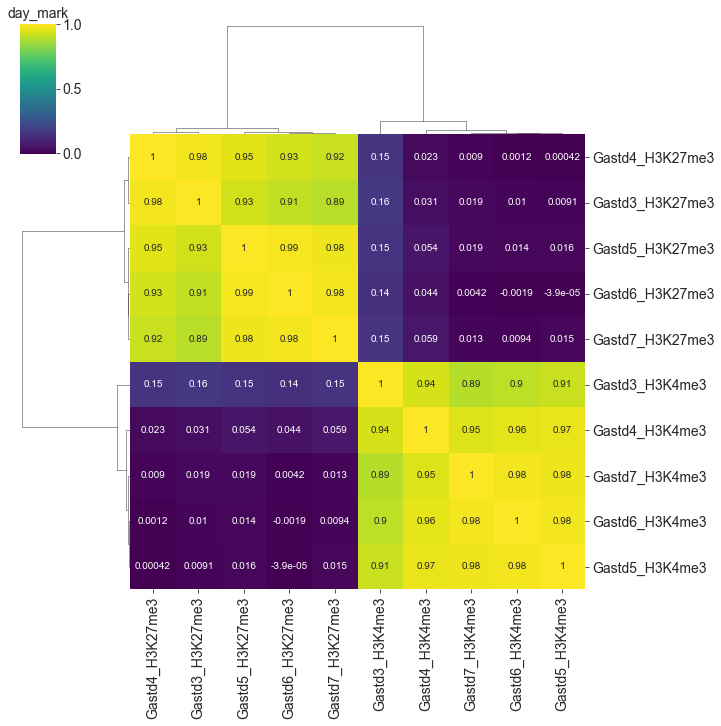

In [122]:
sns.clustermap(matrix.astype(float).corr(method='pearson'),figsize=(10,10), cmap = 'viridis', annot=True)
plt.title('day_mark')